In [206]:
!pip install altair

In [207]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from pandas.plotting import parallel_coordinates
import altair as alt

In [208]:
df = pd.read_csv("./datasets/HR_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Biểu đồ 1:

**Tiêu đề:** Mức độ hài lòng và cân bằng trong công việc theo độ tuổi.

**Loại biểu đồ:** Line plot

**Lý do lựa chọn:**
Để trực quan sự thay đổi mức độ đánh giá theo độ tuổi, line plot là một loại biểu đồ thích hợp. Vì các điểm dữ liệu có giá trị gần nhau và nằm khoảng giá trị khá nhỏ, nên thang đo đánh giá không bắt đầu từ 1. Điều này không ảnh hưởng đến độ chính xác trong đánh giá vì biểu đồ chỉ so sánh sự cao thấp giữa các giá trị, không đánh giá gấp bao nhiêu lần,... 

**Trực quan hóa:**

In [209]:
def year_stats(year):
    return year//5;

df_ = df.copy()
df_['year_stats'] = df_['YearsAtCompany'].map(year_stats)

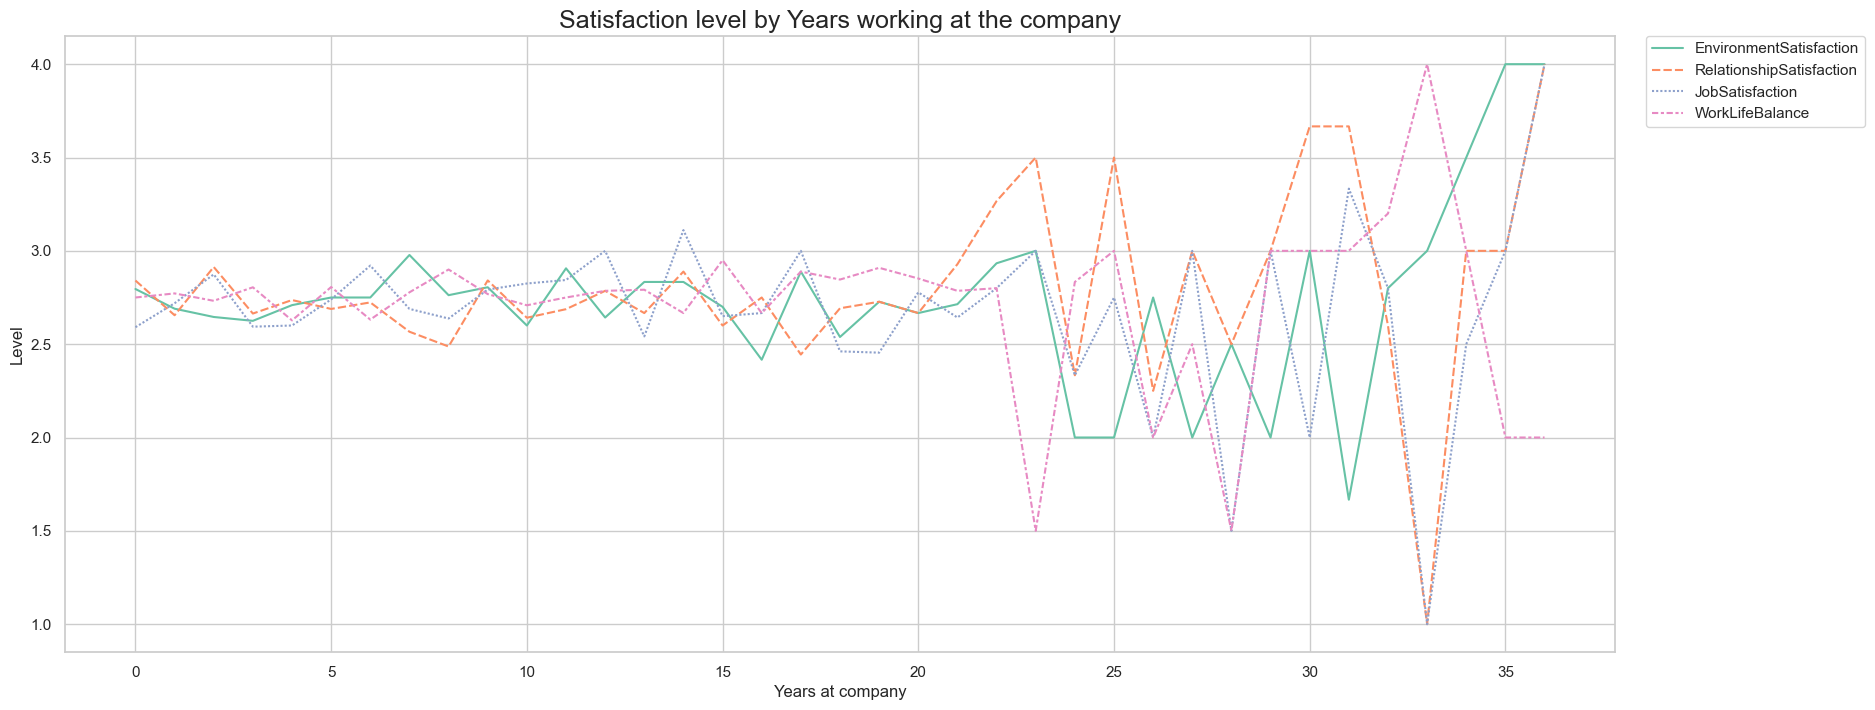

In [210]:
df_satis = df_[['EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','WorkLifeBalance', 'YearsAtCompany', 'year_stats']]
df_satis_year = df_satis.groupby('YearsAtCompany')[['EnvironmentSatisfaction','RelationshipSatisfaction','WorkLifeBalance', 'JobSatisfaction']].mean().reset_index()
sns.set_palette("Set2")
sns.set_style('whitegrid')
sns.lineplot(data = df_satis_year[['EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','WorkLifeBalance']])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Satisfaction level by Years working at the company', fontsize = 18)

plt.xlabel('Years at company')
plt.ylabel('Level')
plt.show()

**Nhận xét:** Từ biểu đồ ta thấy:
- Có sự khác biệt rõ rệt giữa sự hài lòng của nhân viên theo độ tuổi, được phân cách rõ rệt ở năm làm việc thứ 20.
- Nhóm dưới 20 tuổi: ít có biến động hơn, dao động ở mức 2.5-3.
- Nhóm trên 20 tuổi:
    - Biến động nhiều hơn. Càng gắn bó với công ty, càng tiếp cận được nhiều khía cạnh khác nhau của công việc, nhu cầu mà mọi người đòi hỏi trong công việc cũng đa dạng hơn.
    - Work-life balance thường xu hướng ngược lại so với các đặc điểm còn lại. Điều này thể hiện sự hài lòng trong công việc ở 3 khía cạnh (môi trường, mối quan hệ, công việc) thường song hành và có liên quan với nhau. Ngoài ra sự hài lòng còn là động lực lớn với employees, họ có xu hướng dành nhiều thời gian cho công việc hơn. Từ đó thời gian cho các hoạt động khác của cuộc sống cũng giảm, ảnh hưởng work-life balance. 
    - Càng gắn bó với công ty, sự ảnh hưởng ngày càng rõ rệt. Dù khi đó employees đã có kinh nghiệm làm việc ở công ty đó.

## Biểu đồ 2:

**Tiêu đề:** Phân bố mức lương theo vị trí công việc và mức độ hài lòng của mọi người.

**Loại biểu đồ:** Dot and jitter plot.

**Lý do lựa chọn:**
Để trực quan sự phân bố giữa các categorical variables khác nhau, ta chọn jitter plots. Sau đó ta thêm việc trực quan Attrition vote của nhân viên qua việc thể hiện các chấm dữ liệu bằng các màu sắc khác nhau. Từ đó có thể nhìn thấy sự liên quan về mức lương với attrition vote giữa nhân viên ở các vai trò công việc khác nhau.
**Trực quan hóa:**

In [211]:
df_['satisfaction'] = (df_['JobSatisfaction'] + df_['EnvironmentSatisfaction'] + df_['RelationshipSatisfaction'])/3

In [212]:
stripplot =  alt.Chart(df_, width=120,  title="Monthly income by Job Roles and Attrition rate").mark_circle(size=11).encode(
    #color = "Attrition",
    color=alt.Color('Attrition', scale=alt.Scale(scheme='dark2')),
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale()
    ),
    y=alt.Y('MonthlyIncome:Q'),
    #color=alt.Color('JobRole:N', legend=None),
    column=alt.Column(
        'JobRole:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='center',
            labelPadding=10,
        ),
    ),
    
    tooltip = ["JobRole", "MonthlyIncome"]
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).properties(
    width=125,
    height=500
).configure_title(
    fontSize=20,
    anchor='middle',  # <---- does not take effect, why?
    color='gray'
)
stripplot

alt.Chart(...)

**Nhận xét:** Từ biểu đồ ta thấy:
- Phân bố mức lương của các vị trí công việc có sự khác biệt. Trong đó cao nhất là Manager và Research Director, đây là các vị trí quản lý. Đây cũng là 2 nhóm có số lượng nhân viên Hối hận thấp nhất.
- Vị trí Human Resources có số lượng ít nhưng range lương cũng trải ra một khoảng khá rộng, thể hiện dù nghề này ít nhân sự nhưng mức lương cũng có sự đa dạng giữa các cá nhân.
- Khi phân chia về Attrition rating, ta thấy có sự phân nhóm khá rõ nét với 2 vị trí là Human Resources và Sales Representative. Những người vote Yes thì nằm ở nhóm có mức lương thấp hơn, do đó có thể thấy mức lương ảnh hưởng nhiều đến đánh giá của nhân viên về công việc ở hai ngành này. Các ngành còn lại, Attrition vote không có sự khác biệt nhiều ở các rank lương (các dot nằm khá trộn lẫn vào nhau).




## Biểu đồ 3:

**Tiêu đề:** Phân bố mức đọ cân bằng trong công việc ở các giới tính

**Loại biểu đồ:** Stacked bar chart.

**Lý do lựa chọn:**
So sánh số lượng nhân viên làm việc quá giờ ở các vai trò công việc khác nhau, biểu đồ cột chồng là phù hợp vì thể hiện được tổng số lượng và cả số lượng của mỗi thành phần trong nó.
**Trực quan hóa:**

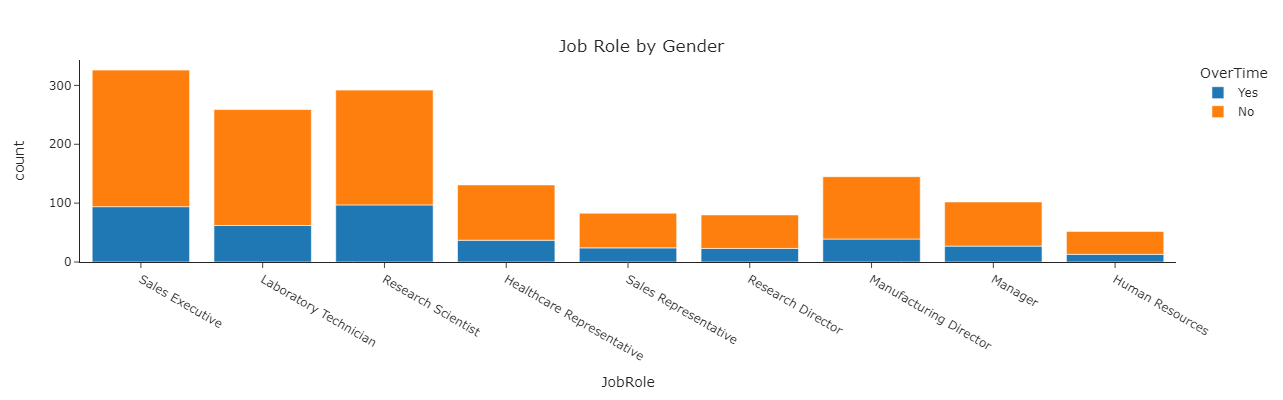

In [213]:
fig = px.histogram(data_frame = df_, x = 'JobRole', color = 'OverTime',
                 width=600, height=400, template="simple_white")

fig.update_layout(
    title={
        'text': "Job Role by Gender",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**Nhận xét:** Từ biểu đồ ta thấy:
- 3 vị trí nhiều nhân sự nhất là: Sale Executive, Research Scientist và Laboratory Technician.
- Tỉ lệ làm việc OverTime gấp gần 2 lần nhóm không làm việc quá giờ. Xu hướng làm việc OT đang ngày càng phổ biến.
